#Building a Rental Apartment Database with Web Scraping

In [ ]:
import requests  # Importing the requests library to make HTTP requests
from bs4 import BeautifulSoup as bs  # Importing BeautifulSoup to parse HTML documents
import pandas as pd  # Importing Pandas library to manipulate data

In [ ]:
url = 'https://www.argenprop.com/inmuebles-alquiler-localidad-capital-federal' # The URL of the webpage to scrape
search = requests.get(url, verify = True, headers = {"User-Agent":'Mozilla/5.0'})  # Making a GET request to the URL
print(f'El status es: {search.status_code}') # Printing the status code of the request
parse_search = bs(search.content, 'html.parser') # Parsing the HTML content of the response using BeautifulSoup

El status es: 200


In [ ]:
#Let's see what type of information we obtained
tag_apartment_1 = parse_search.find(name='div', attrs={'class': 'listing__item'}) # tag containing metadata of the first apartment
print(tag_apartment_1.prettify()[:200]) # See the general tag of the first apartment

<div class="listing__item">
 <a class="card" data-item-card="12609631" data-item-id-visibilidad="16102361" data-track-dormitorios="" data-track-idaviso="12609631" data-track-idbarrio="" data-track-idl


In [ ]:
tag_apartment_1 = tag_apartment_1.find(name='a', attrs={'class': 'card'}) # The tag where the url of the apartment we are interested in is contained
print(tag_apartment_1.prettify()[:200])
print(tag_apartment_1.attrs['href']) # The url of the tag, we see that it is actually a subdomain within the web page.

<a class="card" data-item-card="12609631" data-item-id-visibilidad="16102361" data-track-dormitorios="" data-track-idaviso="12609631" data-track-idbarrio="" data-track-idlocalidad="2102" data-track-id
/departamento-en-alquiler-en-belgrano-4-ambientes--12609631


In [ ]:
#If we want to search for all the apartments that appear on the page, we use find_all for the first search we did
tag_apartments = parse_search.findAll(name='div', attrs={'class': 'listing__item'})
print(f'The object type is: {type(tag_apartments)}, which can be treated as a list (i.e. we can iterate over it)')
print(f'The number of apartments we found is: {len(tag_apartments)}')

The object type is: <class 'bs4.element.ResultSet'>, which can be treated as a list (i.e. we can iterate over it)
The number of apartments we found is: 20


In [ ]:
#So, if we want all the urls of these apartments, we can do the following iteration:
base = 'https://www.argenprop.com' # Define the argenprop domain to add to the href of each apartment

apart_urls = [base + t.find(name='a', attrs={'class': 'card'}).attrs['href'] for t in tag_apartments]

apart_urls # And thus we obtain the list of the first 20 apartments shown on the first page of argenprop

['https://www.argenprop.com/departamento-en-alquiler-en-belgrano-4-ambientes--12609631',
 'https://www.argenprop.com/departamento-en-alquiler-en-belgrano--8343599',
 'https://www.argenprop.com/galpon-en-alquiler-en-villa-lugano--12733950',
 'https://www.argenprop.com/departamento-en-alquiler-en-chacarita-3-ambientes--12078406',
 'https://www.argenprop.com/departamento-en-alquiler-en-palermo-chico-3-ambientes--11895172',
 'https://www.argenprop.com/departamento-en-alquiler-en-palermo-4-ambientes--5645488',
 'https://www.argenprop.com/departamento-en-alquiler-en-belgrano-c-1-ambiente--12697669',
 'https://www.argenprop.com/departamento-en-alquiler-en-belgrano-5-ambientes--12718939',
 'https://www.argenprop.com/departamento-en-alquiler-en-parque-las-heras-4-ambientes--5645486',
 'https://www.argenprop.com/oficina-en-alquiler-en-centro-4-ambientes--12565901',
 'https://www.argenprop.com/departamento-en-alquiler-en-caballito-2-ambientes--11285692',
 'https://www.argenprop.com/departamento-e

In [ ]:
apart_url = apart_urls[1]
apart_search = requests.get(apart_url, verify=True, headers={"User-Agent": 'Mozilla/5.0'})
print(f'The status is: {apart_search.status_code}') # Check that everything went well
parse_apart_search = bs(apart_search.content, 'html.parser')
print(parse_apart_search.prettify()[2000:4000])

The status is: 200
OFESIONAL O COMERCIAL DEMOSTRABLE  sin expensas, frente primer piso - 87  m² Cubierta | 3 dormitorios | 2 baños | Frente" name="description"/>
  <meta content="https://static1.sosiva451.com/9953438/23ff676a-9574-464c-9b80-4217d3c18b6e_u_medium.jpg" property="og:image"/>
  <meta content="website" property="og:type"/>
  <meta content="https://www.argenprop.com/departamento-en-alquiler-en-belgrano--8343599" property="og:url"/>
  <meta content="EXCLUSIVAMENTE PARA USO PROFESIONAL O COMERCIAL DEMOSTRABLE  sin expensas, frente primer piso " property="og:description"/>
  <meta content="Departamento en alquiler en Mendoza  2400, Piso 1 - Belgrano - Argenprop" property="og:title"/>
  <meta content="Argenprop" property="og:site_name"/>
  <meta content="963532813734086" property="fb:app_id"/>
  <link href="/styles/argenprop/property.css?v=APfgKzGOvApODKXzPzDKxJcZFEw" media="screen" rel="stylesheet">
   <!-- Google Tag Manager -->
   <script async="async" defer="">
    (function

In [ ]:
location = parse_apart_search.find(name = 'div', attrs = {'class' : 'map-container'}).findNext().attrs
print(location)
print(f'Latitude : {location["data-latitude"]}')
print(f'Longitude : {location["data-longitude"]}')

{'class': ['leaflet-container'], 'data-location-map': '', 'data-url': 'https://static1.sosiva451.com/Mapas/{z}/{x}/{y}', 'data-latitude': '-34,561317', 'data-longitude': '-58,45802', 'data-attribution': 'Argenprop © en colaboración con', 'data-syst': 'Argenprop', 'data-location': 'Ficha', 'data-ad': '8343599', 'data-origin': 'CK35251'}
Latitude : -34,561317
Longitude : -58,45802


In [ ]:
features = parse_apart_search.findAll('ul', attrs={'class': 'property-features'})
print(features[2].prettify) # We see that within the features, what the page calls Caracteristicas, Basic Data, Surface, etc.

<bound method Tag.prettify of <ul class="property-features collapse" id="section_3">
<li>
<p>
                                            Sup. Cubierta:
                                            <strong>
                                                87  m2
                                            </strong>
</p>
</li>
<li>
<p>
                                            Sup. Descubierta:
                                            <strong>
                                                9  m2
                                            </strong>
</p>
</li>
</ul>>


## **Process Automation**

In [ ]:
import time 
import numpy as np

In [ ]:
def aux_apartment_url(apartment, *args):
    """
    This auxiliary function allows us to avoid errors associated with tags that are not for apartments or do not have the url defined.
    """
    try:
      return base + apartment.find(name='a', attrs={'class': 'card'}).attrs['href']
    except:
      return None

def detect_apartment_urls(search_page_url, base_url):
  """
  This function searches for the urls of apartments given a specific page and returns a list with the urls of each apartment.
  Parameters
  ----------
  search_page_url : string
      The url to scrape in search of apartments.
  base_url : string
      The base url of the page. It is used to return the apartment url ready to use.

  Returns
  -------
  apartment_urls : list
      A list containing the urls of the apartments of each page.
  """

  soup = bs(requests.get(search_page_url, verify=True, headers={"User-Agent": 'Mozilla/5.0'}).content, 'html.parser')

  apartment_urls = [aux_apartment_url(apartment, base_url) for apartment in soup.findAll(name='div', attrs={'class': 'listing__item'})]
      
  return apartment_urls

def get_apartment_info(apartment_url):
    """
    Given an apartment url, this function returns the information associated with it

    Parameters
    ----------
    apartment_url : string
        The url of an apartment.

    Returns
    -------
    apartment_info : dict
        A dictionary of apartment attributes. If an attribute is not found, it returns ''.

    """
    apartment_info = {
        'location': None,
        'latitude': None,
        'longitude': None,
        'bedrooms': None,
        'bathrooms': None,
        'antiquity': None,
        'expenses': None,
        'price': None,
        'currency': None,
        'covered_area': None,
        'uncovered_area': None,
        'url': None
    }
    
    soup = bs(requests.get(apartment_url, verify = True, headers = {"User-Agent":'Mozilla/5.0'}
    				       ).content,
                         'html.parser'
                         )
    apartment_info['url'] = apartment_url
    try:
        ubicacion = soup.find(name = 'div', attrs = {'class' : 'map-container'}).findNext().attrs
        apartment_info['latitude'] = ubicacion['data-latitude'].replace(',','.')
        apartment_info['longitude'] = ubicacion['data-longitude'].replace(',','.')
    except:
        pass
    
    try:
        apartment_info['location'] = soup.find('h3', {'class' : 'titlebar__address'}).text.lower()
    except:
        pass        
    features = soup.findAll('ul',
                                   attrs = {'class' : 'property-features'}
                                   )
    try:
        apartment_info['bathrooms'] = soup.find('i', {'class' : 'icono-cantidad_banos'}).find_next().find_next().text
    except:
        pass
    try:
        apartment_info['bedrooms'] = soup.find('i', {'class' : 'icono-cantidad_dormitorios'}).find_next().find_next().text
    except:
        pass
    for feature in features:
        for child in feature.findChildren(name = 'p'):
            attr_list = child.text.replace(':','').replace('.','').split()
            if 'Dormitorios' in attr_list:
                apartment_info['bedrooms'] = attr_list[-1]
            elif 'Baños' in attr_list:
                apartment_info['bathrooms'] = attr_list[-1]
            elif 'Antiguedad' in attr_list:
                apartment_info['antiquity'] = attr_list[-1]
            elif 'Expensas' in attr_list and '$' in attr_list:
                apartment_info['expenses'] = attr_list[-1]
            elif 'Precio' in attr_list and '$' in attr_list:
                apartment_info['price'] = attr_list[-1]
                apartment_info['currency'] = attr_list[attr_list.index('$')]
            elif 'Precio' in attr_list and 'USD' in attr_list:
                apartment_info['price'] = attr_list[-1]
                apartment_info['currency'] = attr_list[attr_list.index('USD')]                
            elif 'Sup' in attr_list and 'Cubierta' in attr_list:
                apartment_info['covered_area'] = attr_list[-2].replace(',','.')
            elif 'Sup' in attr_list and 'Descubierta' in attr_list:
                apartment_info['uncovered_area'] = attr_list[-2].replace(',','.')
            
    
    return apartment_info

def get_apartment_urls_info(search_page_url, base_url, page_count, from_page=1):
    """
    This function gathers all the previous ones in order to loop through the specified number
    of pages and extract information from each apartment, storing it as a dictionary.
    """
    apartments_info = {}
    apartment_id = 1
    for k in range(from_page, page_count + 1):
        apartments_urls = detect_apartment_urls(search_page_url, base_url)
        apartments_urls = [url for url in apartments_urls if url != None]
        for apartment_url in apartments_urls:
            apartments_info[apartment_id] = get_apartment_info(apartment_url)
            time.sleep(1 * np.random.random())
            apartment_id += 1
        
        if k == from_page:
            search_page_url += '-pagina-{}'.format(from_page)
            
        search_page_url = search_page_url.replace('-pagina-{}'.format(k),
                                                          '-pagina-{}'.format(k + 1))

    
    return apartments_info

let's try a lot of websites

In [ ]:
base = 'https://www.argenprop.com'
url = 'https://www.argenprop.com/departamento-alquiler-localidad-capital-federal-orden-masnuevos'

apartment_info = get_apartment_urls_info(url,
                                base,
                                page_count = 2)

In [ ]:
print(f'We obtained information from {len(apartment_info)} apartments')

We obtained information from 40 apartments


In [ ]:
apartment_info_df = pd.DataFrame(apartment_info).T
apartment_info_df

,location,latitude,longitude,bedrooms,bathrooms,antiquity,expenses,price,currency,covered_area,uncovered_area,url
1,caboto 400,-34.62781,-58.360073,1,1,5,None,175000,$,60,None,https://www.argenprop.com/departamento-en-alqu...
2,baez al 700,-34.56832,-58.434887,2,2,None,3500,1300,USD,None,4,https://www.argenprop.com/departamento-en-alqu...
3,arenales 2300,-34.59412,-58.398865,1,1,20,None,800,USD,40,4,https://www.argenprop.com/departamento-en-alqu...
4,ramón freire 2000,-34.5677,-58.46364,1,1,60,14500,100000,$,32,7,https://www.argenprop.com/departamento-en-alqu...
5,"palmar 6600, piso 5",-34.64356,-58.52048,2,1,25,32000,120000,$,65,8,https://www.argenprop.com/departamento-en-alqu...
6,soler 3900,-34.59218,-58.417007,3,1,43,35000,None,None,68,None,https://www.argenprop.com/departamento-en-alqu...
7,"serrano 1300, piso 6",-34.603683,-58.381557,2,1,40,22600,170000,$,57,None,https://www.argenprop.com/departamento-en-alqu...
8,gandara al 2700,-34.582977,-58.48058,2,1,None,None,130000,$,None,None,https://www.argenprop.com/departamento-en-alqu...
9,moldes 1300,-34.56928,-58.45342,1,1,45,10500,90000,$,30,None,https://www.argenprop.com/departamento-en-alqu...
10,art maria 4 amb. coch. 140mts amoblado,-34.62197,-58.361664,3,2,None,90000,3900,USD,None,None,https://www.argenprop.com/departamento-en-alqu...


# Palermo

Now a specific neighbourhood


In [ ]:
base = 'https://www.argenprop.com'
url = 'https://www.argenprop.com/departamento-alquiler-barrio-palermo-localidad-capital-federal-orden-masnuevos'

apartment_info_palermo = get_apartment_urls_info(url,
                                base,
                                page_count = 4)

In [ ]:
print(f'We obtained information from {len(apartment_info_palermo)} apartments')

We obtained information from 80 apartments


In [ ]:
apartment_info_palermo_df = pd.DataFrame(apartment_info_palermo).T
apartment_info_palermo_df

,location,latitude,longitude,bedrooms,bathrooms,antiquity,expenses,price,currency,covered_area,uncovered_area,url
1,soler 3900,-34.59218,-58.417007,3,1,43,35000,None,None,68,None,https://www.argenprop.com/departamento-en-alqu...
2,"serrano 1300, piso 6",-34.603683,-58.381557,2,1,40,22600,170000,$,57,None,https://www.argenprop.com/departamento-en-alqu...
3,ugarteche al 2800- disponible desde el 5 de junio,-34.57736,-58.40712,1,1,100,7126,1000,USD,35,2,https://www.argenprop.com/departamento-en-alqu...
4,lafinur 3300,-34.577393,-58.41228,3,None,70,63811,950,USD,109,None,https://www.argenprop.com/departamento-en-alqu...
5,cerviño al 4500,-34.57611,-58.422016,2,2,20,140000,2200,USD,108,11,https://www.argenprop.com/departamento-en-alqu...
...,...,...,...,...,...,...,...,...,...,...,...,...
76,"segui 3900, increible duplex reciclado !",-34.577194,-58.41276,3,4,30,113000,2000,USD,190,None,https://www.argenprop.com/departamento-en-alqu...
77,av cordoba 3400,-34.59799,-58.41435,Monoambiente,1,35,25000,130000,$,25,None,https://www.argenprop.com/departamento-en-alqu...
78,scalabrini ortiz raul 2200,-34.58704,-58.41972,1,None,35,8800,105000,$,34,None,https://www.argenprop.com/departamento-en-alqu...
79,julián álvarez 1900,-34.58977,-58.420166,Monoambiente,1,26,13500,110000,$,35,2,https://www.argenprop.com/departamento-en-alqu...


In [ ]:
apartment_info_palermo_df.price = pd.to_numeric(apartment_info_palermo_df.price, errors='coerce')


df = apartment_info_palermo_df.sort_values(by=['price'])
df

,location,latitude,longitude,bedrooms,bathrooms,antiquity,expenses,price,currency,covered_area,uncovered_area,url
20,humboldt 2400,-34.578686,-58.42853,Monoambiente,1,13,22000,300.0,USD,33,None,https://www.argenprop.com/departamento-en-alqu...
66,thames 1800,-34.58649,-58.42893,Monoambiente,None,30,10000,500.0,USD,44,None,https://www.argenprop.com/departamento-en-alqu...
27,charcas al 4900,-34.579823,-58.42844,1,2,4,None,550.0,USD,45,5,https://www.argenprop.com/departamento-en-alqu...
23,francisco acuña de figueroa 1300,-34.596264,-58.42164,1,1,45,None,550.0,USD,35,None,https://www.argenprop.com/departamento-en-alqu...
19,bulnes al 2600,-34.581917,-58.40647,2,1,40,35000,600.0,USD,55,None,https://www.argenprop.com/departamento-en-alqu...
...,...,...,...,...,...,...,...,...,...,...,...,...
45,scalabrini ortiz raul av. al 2700,-34.591896,-58.426933,2,1,45,30000,280000.0,$,80,12,https://www.argenprop.com/departamento-en-alqu...
61,borges 2100,-34.58528,-58.424946,2,1,20,40000,320000.0,$,67,7,https://www.argenprop.com/departamento-en-alqu...
38,"malabia 2400, piso 18",-34.584675,-58.417645,3,3,30,65000,380000.0,$,115,11,https://www.argenprop.com/departamento-en-alqu...
70,"av scalabrini ortiz 3000, piso 27",-34.581642,-58.411003,4,3,None,96000,599000.0,$,180,None,https://www.argenprop.com/departamento-en-alqu...


## **Statistics**
*ToDo*

Number of apartments in Dollar and Pesos

In [ ]:
from statistics import mean  # Importing mean function from statistics module
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
apartment_info_df['currency'].value_counts()

$      23
USD    15
Name: currency, dtype: int64

In [ ]:
apartment_info_palermo_df['currency'].value_counts()

USD    54
$      25
Name: currency, dtype: int64

In [ ]:
url = 'https://dolarhoy.com/'  # The URL of the webpage to scrape
search = requests.get(url, verify=True, headers={"User-Agent": 'Mozilla/5.0'})  # Making a GET request to the URL
print(f'Status Code: {search.status_code}')  # Printing the status code of the request
search_parseada = bs(search.content, 'html.parser')  # Parsing the HTML content of the response using BeautifulSoup

Status Code: 200


In [ ]:
nombres = search_parseada.find_all(name='a', attrs={'class': 'title'})[1:]  # Finding all names

dolares = search_parseada.find_all(name='div', attrs={'class': 'val'})[2:]  # Finding all values

dolar_fecha = search_parseada.find(name='div', attrs={'class': 'tile update'}).text  # Finding the update time

In [ ]:
titulos = []

for i in range(2*len(nombres)-1):
  titulos.append(nombres[int(i/2)].contents[0])

In [ ]:
for i in range(len(dolares)):
  if i % 2 == 0:
    print(titulos[i], '\nCompra:', dolares[i].contents[0])
  else:
    print('Venta:', dolares[i].contents[0], '\n')
print('')
print(dolar_fecha)

Dólar blue 
Compra: $427.00
Venta: $432.00 

Dólar oficial promedio 
Compra: $217.37
Venta: $224.88 

Dólar Bolsa 
Compra: $419.72
Venta: $421.43 

Contado con liqui 
Compra: $429.79
Venta: $437.34 

Dólar cripto 
Compra: $422.00
Venta: $428.00 

Dólar Solidario 
Compra: $370.42

Actualizado el 20/04/23 08:10 PM


In [ ]:
dolar_promedio = mean([float(dolares[0].contents[0][1:]), float(dolares[1].contents[0][1:])])
print(f'Blue Promedio: ${dolar_promedio}')
print(type(dolar_promedio)) 

Blue Promedio: $429.5
<class 'float'>


USD to Peso

In [ ]:
df['price'] = np.where(df.currency == 'USD', df.price*dolar_promedio, df.price)
df['currency'] = '$'

In [ ]:
price_pesos = np.sort(df.price.values)
print(price_pesos)

[  70000.    90000.   100000.   105000.   110000.   115000.   120000.
  120000.   125000.   125000.   125000.   128850.   130000.   130000.
  140000.   140000.   160000.   165000.   170000.   170000.   180000.
  199000.   214750.   236225.   236225.   257700.   257700.   279175.
  280000.   300650.   315682.5  320000.   343600.   343600.   343600.
  380000.   386550.   386550.   408025.   429500.   429500.   429500.
  472450.   472450.   472450.   515400.   515400.   536875.   579825.
  579825.   579825.   599000.   601300.   601300.   644250.   644250.
  644250.   644250.   773100.   773100.   773100.   773100.   773100.
  859000.   859000.   859000.   901950.   944900.   987850.  1052275.
 1073750.  1202600.  1288500.  1288500.  1503250.  1932750.  2491100.
 2577000.  2791750.        nan]


Text(0.5, 1.0, 'Precio en Pesos de 80 Deptos en Palermo')

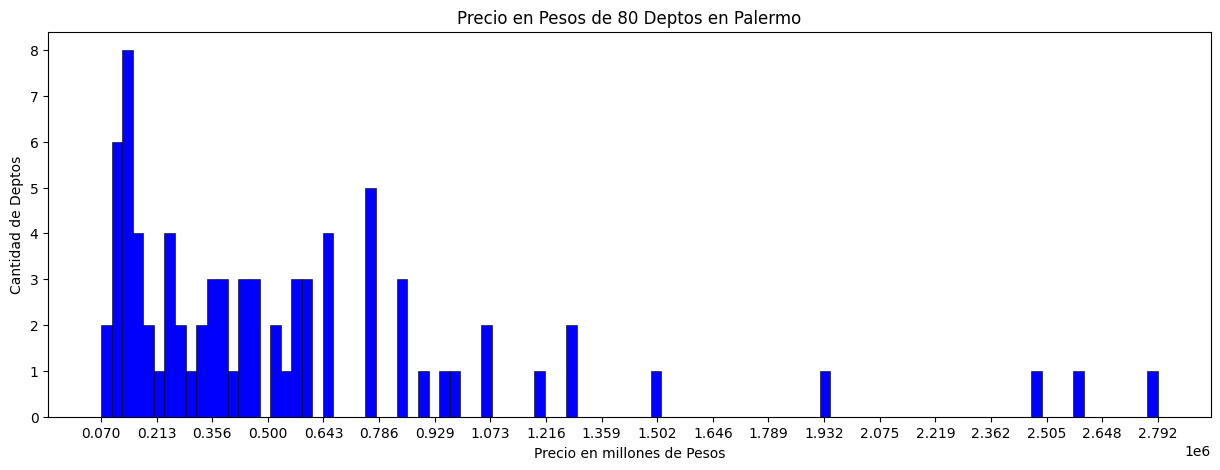

In [ ]:
plt.rcParams["figure.figsize"] = (15,5)
plt.hist(price_pesos, bins=100 , facecolor='blue', edgecolor='black', linewidth=0.4)
plt.xlabel('Precio en millones de Pesos')
plt.xticks(np.linspace(min(price_pesos), max(price_pesos), 20))
plt.ylabel('Cantidad de Deptos')
plt.title('Precio en Pesos de 80 Deptos en Palermo')